## SIFT Scale Invariat Feature Transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Image

In [2]:
img = cv2.imread("FCB.JPG")

In [3]:
cv2.imshow("SIFT",img)
cv2.waitKey(0)

113

## Color Convertion

In [4]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Gray = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)

In [5]:
sc_iv = cv2.pyrDown(rgb)
sc_iv2 = cv2.pyrDown(sc_iv)
num_rows, num_cols = sc_iv2.shape[:2]
print(num_rows)
print(num_cols)

57
57


In [6]:
cv2.imshow("orginal", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("first scale", sc_iv)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("second scale", sc_iv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Rotational Invariance

In [7]:
rot_iv = cv2.getRotationMatrix2D((num_cols/2,num_rows/2),40,0.5)

# Affine Transformation

In [8]:
aff = cv2.warpAffine(sc_iv,rot_iv, (num_cols, num_rows))

# Color Conversion

In [9]:
rot_gray = cv2.cvtColor(aff,cv2.COLOR_RGB2GRAY)

# Rotational Display

In [10]:
fx, plots= plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(rgb)

plots[1].set_title("Testing Image")
plots[1].imshow(aff)

# Let's Go SIFT

In [11]:
sift = cv2.xfeatures2d.SIFT_create()

# Detect and Compute

In [12]:
train_kp, train_des = sift.detectAndCompute(sc_iv, None)
test_kp, test_des = sift.detectAndCompute(rot_gray, None)

# KeyPoints

In [13]:
kp_wo_size = np.copy(rgb)
kp_w_size = np.copy(rgb)

# Drawing KeyPoints

In [ ]:
cv2.drawKeypoints(sc_iv, train_kp, kp_w_size, color = (0,255,0))
cv2.drawKeypoints(sc_iv, train_kp, kp_w_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Keypoint Display

In [15]:
fx, plots= plt.subplots(1,2, figsize=(20,10))

plots[0].set_title("Train keypoints with size")
plots[0].imshow(kp_w_size, cmap= 'gray')

plots[1].set_title("Train keypoints without size")
plots[1].imshow(kp_wo_size, cmap= 'gray')

# Brute Force Matcher Object

In [16]:
bfm = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

# Matching

In [17]:
match = bfm.match(train_des, test_des)

# Sorting

In [18]:
match = sorted(match, key = lambda x : x.distance)

# Drawing Matches

In [19]:
result = cv2.drawMatches(sc_iv, train_kp, rot_gray, test_kp, match, rot_gray, flags =2)

## Matching Display

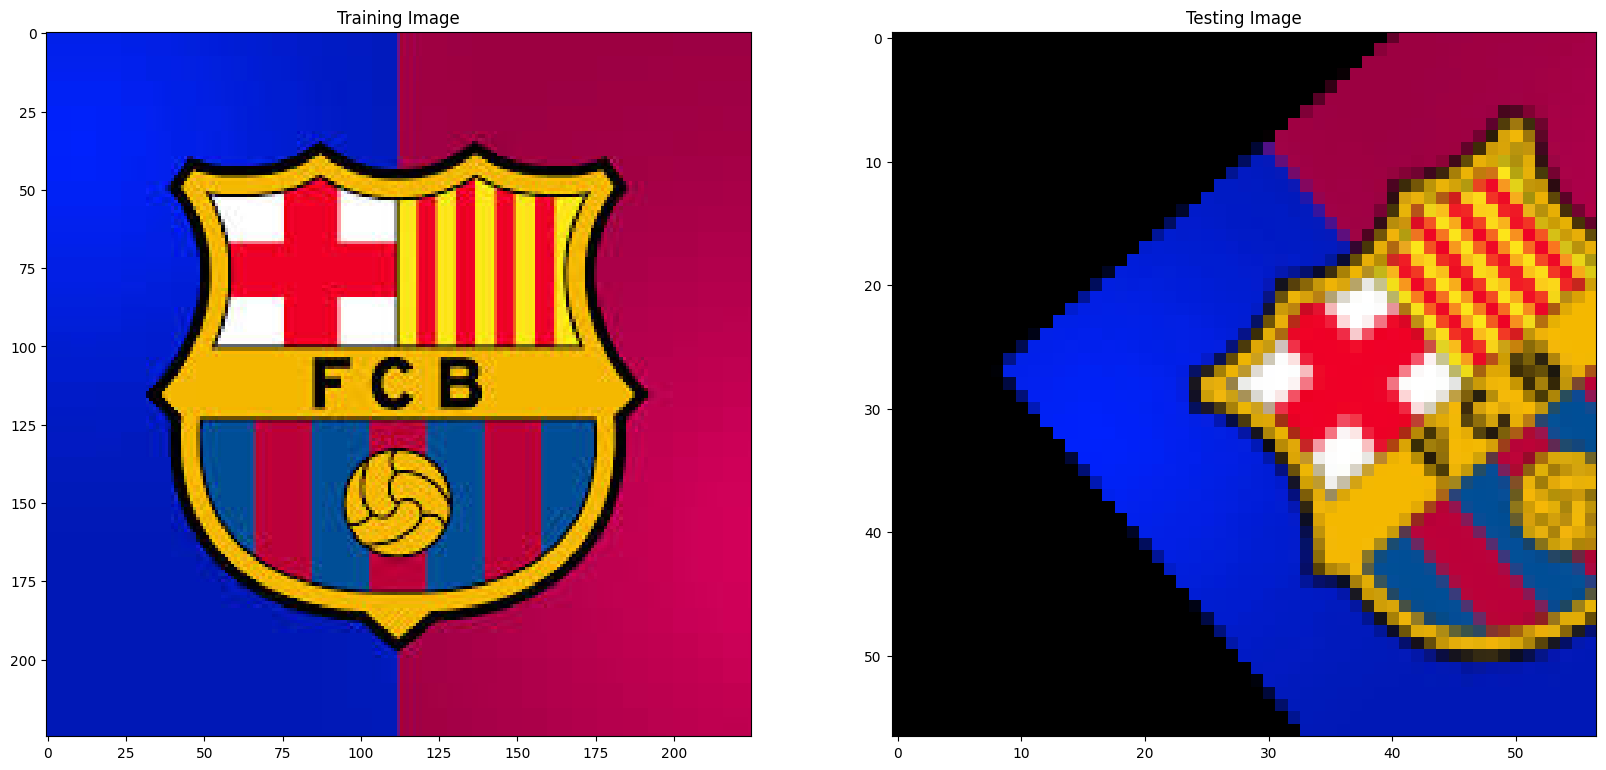

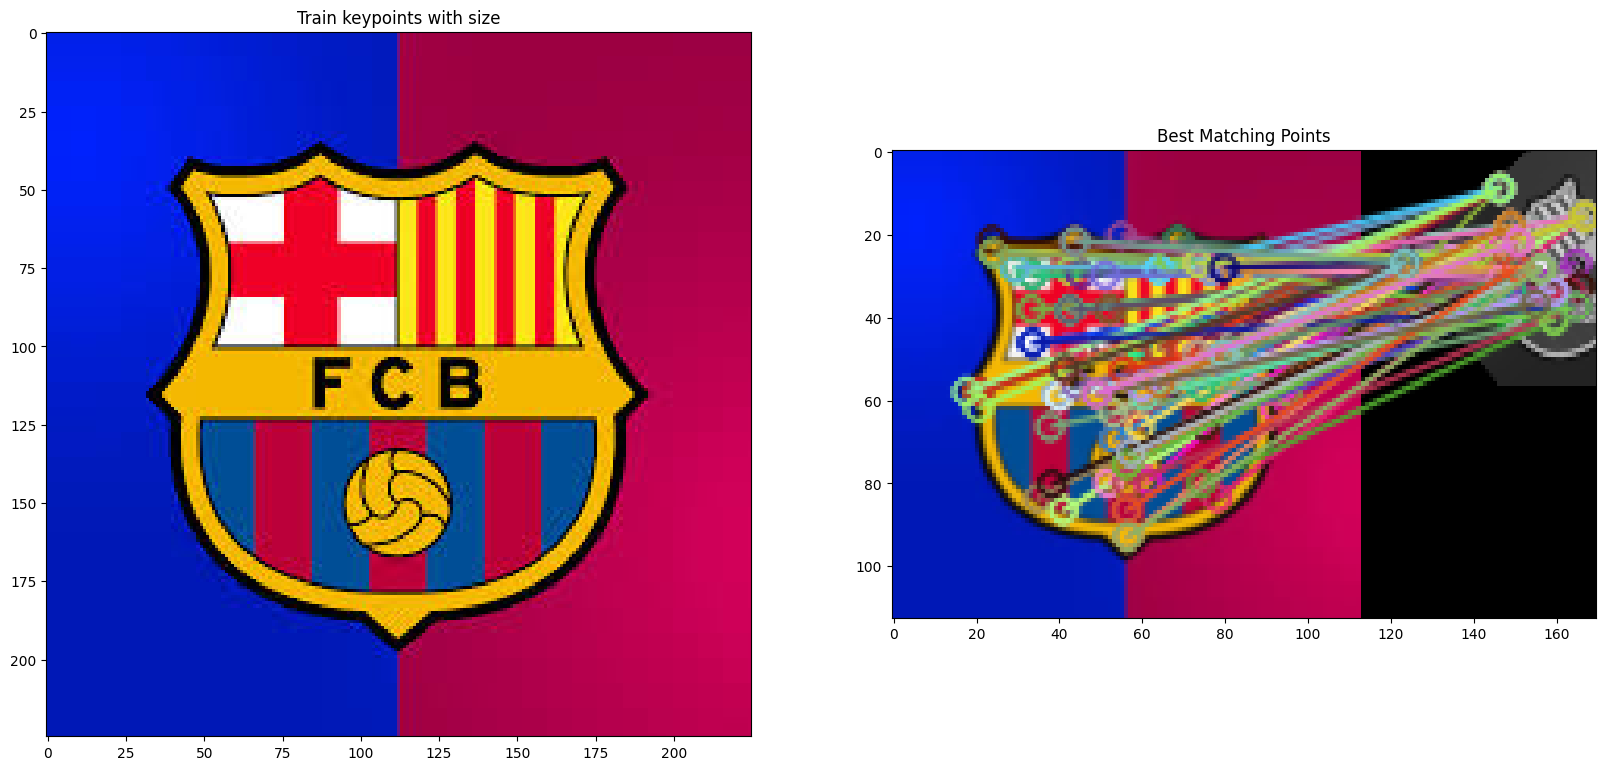

In [20]:
plt.rcParams['figure.figsize'] = [10.0,10.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()